<a href="https://colab.research.google.com/github/ThatManRong/RL_Thesis/blob/Pair-Trading/PairTrading-RealData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from scipy.io import loadmat
import math
import statistics
import os


In [ ]:
dataDir = '/content/drive/My Drive/Colab Notebooks/AAL/'
mats_AAL = []
for file in os.listdir( dataDir ) :
    mats_AAL.append(loadmat( dataDir+file ) )

# dataDir = '/content/drive/My Drive/Colab Notebooks/FB/'
# mats_FB = []
# for file in os.listdir( dataDir ) :
#     mats_FB.append(loadmat( dataDir+file ) )

dataDir = '/content/drive/My Drive/Colab Notebooks/GOOG/'
mats_GOOG = []
for file in os.listdir( dataDir ) :
    mats_GOOG.append(loadmat( dataDir+file ) )
  
# dataDir = '/content/drive/My Drive/Colab Notebooks/SIRI/'
# mats_SIRI = []
# for file in os.listdir( dataDir ) :
#     mats_SIRI.append(loadmat( dataDir+file ) )

# dataDir = '/content/drive/My Drive/Colab Notebooks/INTC/'
# mats_INTC = []
# for file in os.listdir( dataDir ) :
#     mats_INTC.append(loadmat( dataDir+file ) )

# dataDir = '/content/drive/My Drive/Colab Notebooks/VOD/'
# mats_VOD = []
# for file in os.listdir( dataDir ) :
#     mats_VOD.append(loadmat( dataDir+file ) )

In [ ]:
import numpy as np
AAL_BuyPrice = []
AAL_SellPrice = []
FB_BuyPrice = []
FB_SellPrice = []
GOOG_BuyPrice = []
GOOG_SellPrice = []
SIRI_BuyPrice = []
SIRI_SellPrice = []
INTC_BuyPrice = []
INTC_SellPrice = []
VOD_BuyPrice = []
VOD_SellPrice = []
#master_time = []
for i in range(len(mats_AAL)):
  #master_time.append(np.array(mats[i]['data']['EventTime'][0][0]))
  AAL_BuyPrice.append(np.array(mats_AAL[i]['data']['BuyPrice'][0][0]))
  AAL_SellPrice.append(np.array(mats_AAL[i]['data']['SellPrice'][0][0]))

# for i in range(len(mats_FB)):
#   #master_time.append(np.array(mats[i]['data']['EventTime'][0][0]))
#   FB_BuyPrice.append(np.array(mats_FB[i]['data']['BuyPrice'][0][0]))
#   FB_SellPrice.append(np.array(mats_FB[i]['data']['SellPrice'][0][0]))

for i in range(len(mats_GOOG)):
  #master_time.append(np.array(mats[i]['data']['EventTime'][0][0]))
  GOOG_BuyPrice.append(np.array(mats_GOOG[i]['data']['BuyPrice'][0][0]))
  GOOG_SellPrice.append(np.array(mats_GOOG[i]['data']['SellPrice'][0][0]))

# for i in range(len(mats_SIRI)):
#   #master_time.append(np.array(mats[i]['data']['EventTime'][0][0]))
#   SIRI_BuyPrice.append(np.array(mats_SIRI[i]['data']['BuyPrice'][0][0]))
#   SIRI_SellPrice.append(np.array(mats_SIRI[i]['data']['SellPrice'][0][0]))

# for i in range(len(mats_INTC)):
#   #master_time.append(np.array(mats[i]['data']['EventTime'][0][0]))
#   INTC_BuyPrice.append(np.array(mats_INTC[i]['data']['BuyPrice'][0][0]))
#   INTC_SellPrice.append(np.array(mats_INTC[i]['data']['SellPrice'][0][0]))

# for i in range(len(mats_VOD)):
#   #master_time.append(np.array(mats[i]['data']['EventTime'][0][0]))
#   VOD_BuyPrice.append(np.array(mats_VOD[i]['data']['BuyPrice'][0][0]))
#   VOD_SellPrice.append(np.array(mats_VOD[i]['data']['SellPrice'][0][0]))

In [ ]:
print(AAL_BuyPrice[0])

[[544000 543000 542900 ... 517600 516800 512000]
 [544000 543900 543800 ... 537300 536300 536100]
 [544100 544000 543900 ... 538700 537700 537300]
 ...
 [542500 542400 542300 ... 540700 540600 540500]
 [542500 542400 542300 ... 540700 540600 540500]
 [     0      0      0 ...      0      0      0]]


In [ ]:
def clear_master(master):
  result = master
  for i in range(len(master)):
    if len(master[i]) != 23400:
      print(len(master[i]))
      del result[i]
  return result

def flatten_master(master, price_indicator):
  if price_indicator == True:
    result = []
    for i in range(len(master)):
      #print('Percent Done: ', i/len(master))
      for j in range(len(master[i])-1):
        #for k in range(len(master[0][0])):
        result.append((master[i][j][0]-master[i][0][0])/10000)   #Price difference between spot price and price of the beginning. 
  if price_indicator == False:
    result = []
    for i in range(len(master)):
      for j in range(len(master[0])-1):
        #for k in range(len(master[0][0])):
        result.append(master[i][j][0])
  return result


In [ ]:
#abc = clear_master(AAL_BuyPrice)
flattened_AAL_BuyPrice = flatten_master(AAL_BuyPrice, price_indicator = True) 
flattened_AAL_SellPrice = flatten_master(AAL_SellPrice, price_indicator = True) 
flattened_AAL_MidPrice = []
for i in range(len(flattened_AAL_BuyPrice)):
  flattened_AAL_MidPrice.append(0.5*flattened_AAL_BuyPrice[i]+0.5*flattened_AAL_SellPrice[i])

In [ ]:
#abc = clear_master(FB_BuyPrice)
flattened_GOOG_BuyPrice = flatten_master(GOOG_BuyPrice, price_indicator = True) 
flattened_GOOG_SellPrice = flatten_master(GOOG_SellPrice, price_indicator = True) 
flattened_GOOG_MidPrice = []
for i in range(len(flattened_GOOG_BuyPrice)):
  flattened_GOOG_MidPrice.append(0.5*flattened_GOOG_BuyPrice[i]+0.5*flattened_GOOG_SellPrice[i])

In [ ]:
print(len(flattened_AAL_MidPrice))
print(len(flattened_GOOG_MidPrice))    #FB has data available until May 18, but AAL has until Dec 31
timestamp = []
for i in range(len(GOOG_BuyPrice)):
  for j in range(len(GOOG_BuyPrice[i])-1):
    timestamp.append(j)

5869588
2246304


In [ ]:
print(len(timestamp))

2246304


In [ ]:
import pandas as pd
data = {'Time': timestamp, 
        'AAL': flattened_AAL_MidPrice[:2246304],  #Manually adjust to May 18
        'GOOG': flattened_GOOG_MidPrice}
  
# Convert the dictionary into DataFrame 
data = pd.DataFrame(data) 

In [ ]:
def split_into_days(df,timestamp):
  days = []
  record = 0
  for i in range(len(timestamp)-1):
    if timestamp[i]>timestamp[i+1]:
      days.append(df.iloc[record:i+1])
      record = i+1
  return days
def pooling(df, pooling_factor):
  temp = df.iloc[len(df)%pooling_factor:]
  
  pooled_AAL_MidPrice = []
  pooled_FB_MidPrice = []
  pooled_timestamp = []
  for i in range(int(len(temp)/pooling_factor)-1):
    
    pooled_AAL_MidPrice.append(np.mean(list(df['AAL'])[i*pooling_factor:(i+1)*pooling_factor]))
    pooled_FB_MidPrice.append(np.mean(list(df['GOOG'])[i*pooling_factor:(i+1)*pooling_factor]))

    pooled_timestamp.append(i)
  
  result = {'Time': pooled_timestamp, 
        #'BuyPrice': normalized_BuyPrice,
        #'SellPrice' : normalized_SellPrice,
        #'NumberBuyOrder': flattened_NumberBuyOrder,
        # 'BuyVolume': pooled_BuyVolume,
        # 'SellVolume': pooled_SellVolume,
        'AAL': pooled_AAL_MidPrice, 
        'GOOG': pooled_FB_MidPrice}
  result = pd.DataFrame(result) 

  return result

def normalize_0_1(df):

  result_AAL = []
  result_FB = []
  AAL_max = np.max(list(df['AAL']))
  AAL_min = np.min(list(df['AAL']))
  FB_max = np.max(list(df['GOOG']))
  FB_min = np.min(list(df['GOOG']))
  spread = []
  for elem in list(df['AAL']):
    result_AAL.append((elem - AAL_min)/(AAL_max-AAL_min))
  for elem in list(df['GOOG']):
    result_FB.append((elem - FB_min)/(FB_max-FB_min))
  for i in range(len(list(df['GOOG']))):
    spread.append(result_AAL[i]-result_FB[i])
  new_df = {'Time': list(df['Time']), 
        # 'BuyPrice': flattened_BuyPrice,
        # 'SellPrice' : flattened_SellPrice,
        # #'NumberBuyOrder': flattened_NumberBuyOrder,
        # 'BuyVolume': flattened_NumberBuyVolume,
        # 'SellVolume': flattened_NumberSellVolume,
        'AAL': result_AAL,
        'GOOG': result_FB,
        'spread': spread}
  data = pd.DataFrame(new_df) 
  return data

In [ ]:
splitted_data = split_into_days(data,timestamp)
splitted_data_pooled = []
i=0
for dataset in splitted_data:
  i+=1
  print("percentage done: ", i/len(splitted_data))
  splitted_data_pooled.append(normalize_0_1(pooling(dataset,30)))

percentage done:  0.010526315789473684
percentage done:  0.021052631578947368
percentage done:  0.031578947368421054
percentage done:  0.042105263157894736
percentage done:  0.05263157894736842
percentage done:  0.06315789473684211
percentage done:  0.07368421052631578
percentage done:  0.08421052631578947
percentage done:  0.09473684210526316
percentage done:  0.10526315789473684
percentage done:  0.11578947368421053
percentage done:  0.12631578947368421
percentage done:  0.1368421052631579
percentage done:  0.14736842105263157
percentage done:  0.15789473684210525
percentage done:  0.16842105263157894
percentage done:  0.17894736842105263
percentage done:  0.18947368421052632
percentage done:  0.2
percentage done:  0.21052631578947367
percentage done:  0.22105263157894736
percentage done:  0.23157894736842105
percentage done:  0.24210526315789474
percentage done:  0.25263157894736843
percentage done:  0.2631578947368421
percentage done:  0.2736842105263158
percentage done:  0.2842105

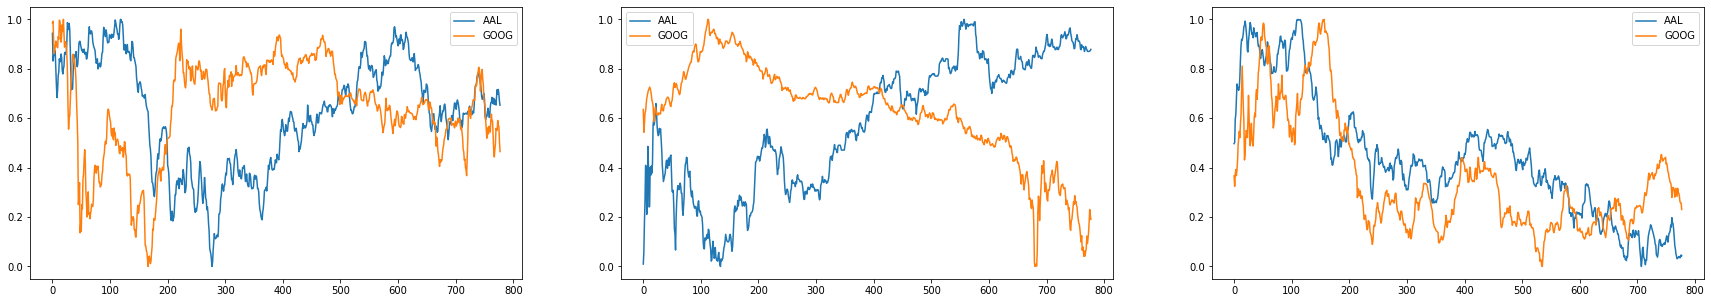

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30,5))
plt.subplot(1,3,1)
plt.plot(splitted_data_pooled[0]['AAL'])
plt.plot(splitted_data_pooled[0]['GOOG'])
plt.legend(["AAL","GOOG"])
plt.subplot(1,3,2)
plt.plot(splitted_data_pooled[1]['AAL'])
plt.plot(splitted_data_pooled[1]['GOOG'])
plt.legend(["AAL","GOOG"])
plt.subplot(1,3,3)
plt.plot(splitted_data_pooled[2]['AAL'])
plt.plot(splitted_data_pooled[2]['GOOG'])
plt.legend(["AAL","GOOG"])


#Co-integration Test

The following codes calculate the p-value for the cointegration test, and the null hypothesis is no cointegration. 

Only correlation is not sufficient here because sometimes we could find a correlated but not cointegrated price relationship. e.g. if two stock prices go up together over time, they are positively correlated. However, if these two stocks trend up in different speeds, the price spread will keep growing rather than oscillating at the equilibrium and hence is non-stationary.


In [ ]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import os
from functools import reduce
from statsmodels.tsa.stattools import coint

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


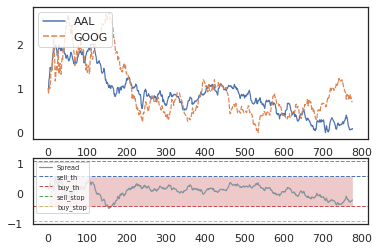

In [ ]:
def plot_spread(df, ticker1, ticker2, idx, th, stop):
  
    px1 = df[ticker1].iloc[idx] / df[ticker1].iloc[idx[0]]
    px2 = df[ticker2].iloc[idx] / df[ticker2].iloc[idx[0]]

    sns.set(style='white')
    
    # Set plotting figure
    fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]})
    
    # Plot the 1st subplot
    sns.lineplot(data=[px1, px2], linewidth=1.2, ax=ax[0])
    ax[0].legend(loc='upper left')
    
    # Calculate the spread and other thresholds
    spread = df[ticker1].iloc[idx] - df[ticker2].iloc[idx]
    mean_spread = spread.mean()
    sell_th     = mean_spread + th
    buy_th      = mean_spread - th
    sell_stop   = mean_spread + stop
    buy_stop    = mean_spread - stop
    
    # Plot the 2nd subplot
    sns.lineplot(data=spread, color='#85929E', ax=ax[1], linewidth=1.2)
    ax[1].axhline(sell_th,   color='b', ls='--', linewidth=1, label='sell_th')
    ax[1].axhline(buy_th,    color='r', ls='--', linewidth=1, label='buy_th')
    ax[1].axhline(sell_stop, color='g', ls='--', linewidth=1, label='sell_stop')
    ax[1].axhline(buy_stop,  color='y', ls='--', linewidth=1, label='buy_stop')
    ax[1].fill_between(idx, sell_th, buy_th, facecolors='r', alpha=0.3)
    ax[1].legend(loc='upper left', labels=['Spread', 'sell_th', 'buy_th', 'sell_stop', 'buy_stop'], prop={'size':6.5})
    
idx = range(0, 777)
plot_spread(splitted_data_pooled[2], 'AAL', 'GOOG', idx, 0.5, 1)



**Marginal Distributions**: 
If we look into the their marginal distributions, the linear relationship is recognized. (We can also found some clusters as well which maybe useful) 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


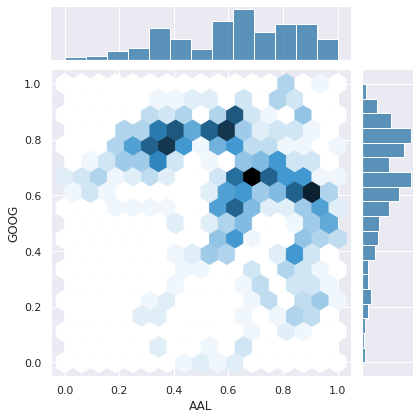

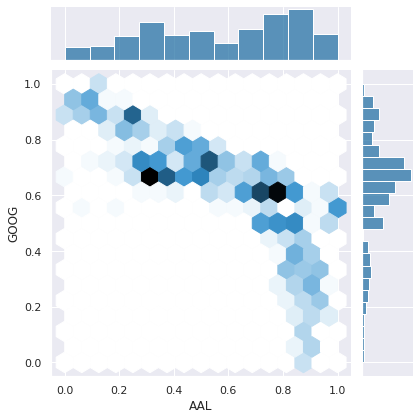

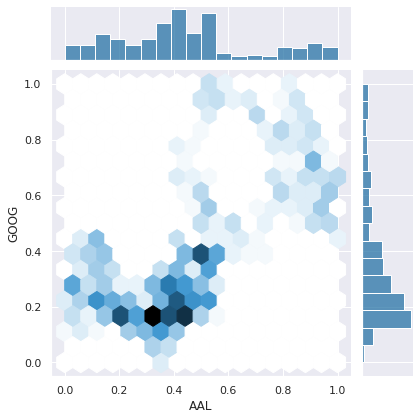

In [ ]:
sns.set(style='darkgrid')
sns.jointplot(splitted_data_pooled[0]['AAL'], splitted_data_pooled[0]['GOOG'],  kind='hex', color='#2874A6')
sns.jointplot(splitted_data_pooled[1]['AAL'], splitted_data_pooled[1]['GOOG'],  kind='hex', color='#2874A6')
sns.jointplot(splitted_data_pooled[2]['AAL'], splitted_data_pooled[2]['GOOG'],  kind='hex', color='#2874A6')

Here I use $coint$, which is effectively the Engle-Granger two-step cointegration test. It tests for the residuals of an estimated cointegrating pairs (2 time series inputs) with I(1). 

The idea here is linked to a concept in time series analysis called **stationarity**. 

Strong-Form: Joint distribution same, that is $P(x_1, x_2, ..., x_k) = P(x_{1+h},x_{2+h}, ..., x_{k+h}) \forall k, h$. This is unrealistic... 


Weak-Form: more applicable in financial time series with the following criteria:


1.   Expected value of random variable x, i.e. E[x(t)], is independent of time t
2.   Variance Var(x(t)) is a time-independent positive and finite constant
3.   Covariance Cov(x(t),x(s)) is finite and related to the time difference t-s, but neither t nor s

If a time series becomes stationary after first differencing, it is so called integrated of order one I(1).

In [ ]:
p_values = []
for data in splitted_data_pooled:
  x = data['AAL']
  #print(x)
  y = data['GOOG']
  #print(y)
  _, p_value, _ = coint(x, y)
  p_values.append(p_value)

The p_value of AAL-GOOG pair cointegration is: 0.3344191534599937


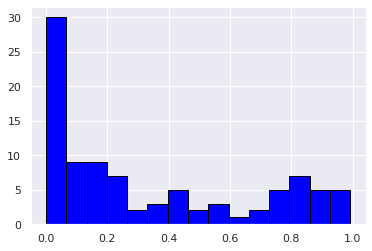

In [ ]:
plt.hist(p_values, color = 'blue', edgecolor = 'black',
         bins = 15)
print('The p_value of AAL-GOOG pair cointegration is: {}'.format(np.mean(p_values)))

#Data Separation

Here I use first 75 days as training sample, and the last 20 days as testing set. 

Need to make sure both have similar composition of co-integrated days... So might try cross-validation later. 





In [ ]:
train_data = splitted_data_pooled[:75]
test_data = splitted_data_pooled[75:95]

The p_value of AAL-GOOG pair cointegration (training dataset): 0.3517863825855591


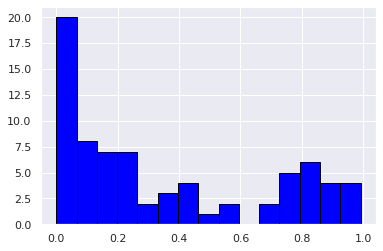

In [ ]:
p_values = []
for data in train_data:
  x = data['AAL']
  #print(x)
  y = data['GOOG']
  #print(y)
  _, p_value, _ = coint(x, y)
  p_values.append(p_value)
plt.hist(p_values, color = 'blue', edgecolor = 'black',
         bins = 15)
print('The p_value of AAL-GOOG pair cointegration (training dataset): {}'.format(np.mean(p_values)))

The p_value of AAL-GOOG pair cointegration (Test dataset): 0.269292044239123


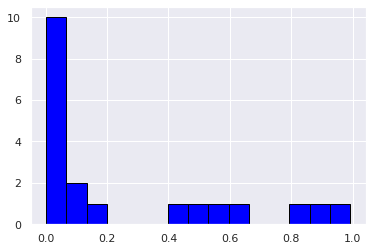

In [ ]:
p_values = []
for data in test_data:
  x = data['AAL']
  #print(x)
  y = data['GOOG']
  #print(y)
  _, p_value, _ = coint(x, y)
  p_values.append(p_value)
plt.hist(p_values, color = 'blue', edgecolor = 'black',
         bins = 15)
print('The p_value of AAL-GOOG pair cointegration (Test dataset): {}'.format(np.mean(p_values)))

#Comment: I think it's all right. But maybe the we will over-estimate performance on test set... 

#Training

Carry from simulation engine, X is AAPL, Y is GOOG. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import copy
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
from plotly import tools
from plotly.graph_objs import *
from plotly.offline import init_notebook_mode, iplot, iplot_mpl

In [ ]:
class Environment1:
    
    def __init__(self, data, history_t=10):
        self.data = data
        self.history_t = history_t
        self.reset()
        
    def reset(self):
        self.t = 0
        self.done = False
        self.profits = 0
        self.positions = [[],[]]   #First list is inventory of X, second is Y
        self.position_value = 0
        self.history = [0 for _ in range(self.history_t)]
        return [self.position_value] + self.history # obs
    
    def step(self, act):
        reward = 0
        
        # act = 0: Hold
        # act = 1: Buy X and Sell Y
        # act = 2: Sell X and Buy Y
        # act = 3: Buy 2X and Sell 2Y
        #...... 
        # Generally, for act > 0: if act is odd, we buy X and sell Y. The amt sold is (act+1) / 2
        # Here act can go from 0 to 19. meaning up to 10 units 
        
        if act == 0:
            pass
        elif act == 19:  #Executing position. 
            profits = 0
            for p in self.positions[0]:
                if p > 0:  #This is a long unit
                    profits += (self.data.iloc[self.t, :]['AAL'] - p)
                if p < 0:  #This is a long unit
                    profits += (-self.data.iloc[self.t, :]['AAL'] - p)    
            for p in self.positions[1]:
                if p > 0:  #This is a long unit
                    profits += (self.data.iloc[self.t, :]['GOOG'] - p)
                if p < 0:  #This is a long unit
                    profits += (-self.data.iloc[self.t, :]['GOOG'] - p)
            reward += profits
            self.profits += profits
            self.positions = [[],[]]
        elif act % 2 == 1:    #buy X and sell Y
            if self.positions != [[],[]]:
                reward = -1
            else:
                for i in range(int(np.ceil((act+1)/2))):
                    self.positions[0].append(self.data.iloc[self.t, :]['AAL'])      #buy x
                    self.positions[1].append(-self.data.iloc[self.t, :]['GOOG'])     #short sell y
        elif act % 2 == 0: # sell X buy Y
            if self.positions != [[],[]]:
                reward = -1
            else:
                for i in range(int(np.ceil((act+1)/2))):
                    self.positions[0].append(-self.data.iloc[self.t, :]['AAL'])      #short x
                    self.positions[1].append(self.data.iloc[self.t, :]['GOOG'])     #buy y
        
        # set next time
        self.t += 1
        
        self.position_value = 0
        for p in self.positions[0]:
            if p > 0:  #This is a long unit
                    self.position_value  += (self.data.iloc[self.t, :]['AAL'] - p)
            if p < 0:  #This is a long unit
                    self.position_value  += (-self.data.iloc[self.t, :]['AAL'] - p)    
        for p in self.positions[1]:
            if p > 0:  #This is a long unit
                self.position_value  += (self.data.iloc[self.t, :]['GOOG'] - p)
            if p < 0:  #This is a long unit
                self.position_value  += (-self.data.iloc[self.t, :]['GOOG'] - p)
        self.history.pop(0)
        X_long = []
        Y_long = []
        X_short = []
        Y_short = []
        for stock in range(len(self.positions)):
            for inventory in self.positions[stock]:
                if inventory < 0 and stock == 0: #Shorted X
                    X_short.append(inventory)
                elif inventory > 0 and stock == 0: #Long X
                    X_long.append(inventory)    
                elif inventory <0 and stock == 1: #Shorted Y
                    Y_short.append(inventory)
                else:
                    Y_long.append(inventory)
        X_long_increment = len(X_long)*((self.data.iloc[self.t, :]['AAL']-self.data.iloc[self.t-1, :]['AAL']))
        Y_long_increment = len(Y_long)*((self.data.iloc[self.t, :]['GOOG']-self.data.iloc[self.t-1, :]['GOOG']))
        X_short_increment = len(X_short)*(-(self.data.iloc[self.t, :]['AAL']-self.data.iloc[self.t-1, :]['AAL']))
        Y_short_increment = len(Y_short)*(-(self.data.iloc[self.t, :]['GOOG']-self.data.iloc[self.t-1, :]['GOOG']))
        self.history.append(X_long_increment+Y_long_increment+X_short_increment+Y_short_increment)
        # clipping reward
        if reward > 0:
            reward = 1
        elif reward < 0:
            reward = -1
        #print ("t={%d}, done={%str}"%(self.t,self.done))
        return [self.position_value] + self.history, reward, self.done, self.positions, self.data.iloc[self.t, :]['spread'] # obs, reward, done

In [ ]:
class Q_Network(nn.Module):
        
    def __init__(self,obs_len,hidden_size,actions_n):
            
        super(Q_Network,self).__init__()
            
        self.fc_val = nn.Sequential(
            nn.Linear(obs_len, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, actions_n)
        )
        
        
    def forward(self,x):
        h =  self.fc_val(x)
        return (h)

In [ ]:
hidden_size=50
input_size=11
output_size=20
USE_CUDA = False
LR = 0.001
Q = Q_Network(input_size, hidden_size, output_size)
Q_ast = copy.deepcopy(Q)
if USE_CUDA:
    Q = Q.cuda()
    print("using Cuda")
loss_function = nn.MSELoss()
optimizer = optim.Adam(list(Q.parameters()), lr=LR)
#epoch_num = 20
memory_size = 7780   #Match with the pooling
batch_size = 778
gamma = 0.99

memory = []
total_step = 0
total_rewards = []
total_losses = []
epsilon = 1.0
epsilon_decrease = 1e-3
epsilon_min = 0.01
start_reduce_epsilon = 200
train_freq = 10
update_q_freq = 20
gamma = 0.999
show_log_freq = 20
num_epoch = 200

In [ ]:
master_reward = []
for i in range(num_epoch):
  for epoch in range(len(train_data)):
      epoch_data = train_data[epoch]
      print("Percentage done: ", epoch/len(train_data))
      #epoch_data = pd.DataFrame(epoch_data) 
      env = Environment1(epoch_data)
      step_max = len(env.data)-1
      pobs = env.reset()
      step = 0
      done = False
      total_reward = 0
      total_loss = 0
      iterations = []
      log_rewards = []
      log_losses = []
      iteration = 1
      trading_history = []
      while not done and step < step_max:
          if done:
            trading_history = []  #For pair trading, make sure the stock
          # select action
          pact = np.random.randint(20)
          if np.random.rand() > epsilon:  #Epsilon greedy Exploration
              pact = Q(torch.from_numpy(np.array(pobs, dtype=np.float32).reshape(1, -1)))
              pact = np.argmax(pact.data)
              pact = pact.numpy()
          # if step == step_max - 1:
          #   pact = 2
          # act
          obs, reward, done,shit1, shit2  = env.step(pact)
          # if done is True:
          #     print("action is: ", actual_action, "  Reward is: ", reward, "  Done? ", done)

          # add memory
          memory.append((pobs, pact, reward, obs, done))
          #memory.append((pobs, actual_action, reward, obs, done))
          if len(memory) > memory_size:
              memory.pop(0)

          # train or update q
          if len(memory) == memory_size:
              if total_step % train_freq == 0:
                  shuffled_memory = np.random.permutation(memory)
                  memory_idx = range(len(shuffled_memory))
                  for i in memory_idx[::batch_size]:
                      batch = np.array(shuffled_memory[i:i+batch_size])
                      b_pobs = np.array(batch[:, 0].tolist(), dtype=np.float32).reshape(batch_size, -1)
                      b_pact = np.array(batch[:, 1].tolist(), dtype=np.int32)
                      b_reward = np.array(batch[:, 2].tolist(), dtype=np.int32)
                      b_obs = np.array(batch[:, 3].tolist(), dtype=np.float32).reshape(batch_size, -1)
                      b_done = np.array(batch[:, 4].tolist(), dtype=np.bool)

                      q = Q(torch.from_numpy(b_pobs))
                      q_ = Q_ast(torch.from_numpy(b_obs))
                      maxq = np.max(q_.data.numpy(),axis=1)
                      target = copy.deepcopy(q.data)
                      for j in range(batch_size):
                          target[j, b_pact[j]] = b_reward[j]+gamma*maxq[j]*(not b_done[j])
                      Q.zero_grad()
                      loss = loss_function(q, target)
                      total_loss += loss.data.item()
                      loss.backward()
                      optimizer.step()
                      
              if total_step % update_q_freq == 0:
                  Q_ast = copy.deepcopy(Q)
                  
              # epsilon
              if epsilon > epsilon_min and total_step > start_reduce_epsilon:
                  epsilon -= epsilon_decrease

              # next step
              total_reward += reward
              pobs = obs
              step += 1
              total_step += 1

          total_rewards.append(total_reward)
          master_reward.append(total_rewards)
          total_losses.append(total_loss)

          if (epoch+1) % show_log_freq == 0:
              
              iterations.append(iteration)
              iteration += 1
              log_reward = sum(total_rewards[((epoch+1)-show_log_freq):])/show_log_freq
              log_rewards.append(log_reward)
              log_loss = sum(total_losses[((epoch+1)-show_log_freq):])/show_log_freq
              log_losses.append(log_loss)
              #elapsed_time = time.time()-start
              print('\t'.join(map(str, [epoch+1, epsilon, total_step, log_reward, log_loss])))
              #start = time.time()
            
#return Q, total_losses, total_rewards

#Result Summary

1. Histogram with statistics on tails
2. Heat Maps
3. Sample Paths

In [ ]:
actions = []
test_profits = []
samplepath_number = []
all_inventory = [[],[]]
all_spread = []
count=0
for dataset in test_data:
  epoch_action = []
  inventory_X = []
  inventory_Y = []
  spread = []
  test_env = Environment1(dataset)
  pobs = test_env.reset()
  test_acts = []
  test_rewards = []
  print("Percentage done: ", count*100/len(test_data))
  count+=1
  for i in range(len(test_env.data)-1):
      #inventory.append(0)
      pact = Q(torch.from_numpy(np.array(pobs, dtype=np.float32).reshape(1, -1)))
      pact = np.argmax(pact.data)
      test_acts.append(pact.item())
      #print(pact.numpy())        
      # if pact.numpy() == 1:
      #   if i > 0:
      #     inventory[i] = inventory[i-1]+1

      obs, reward, done, epoch_inventory, epoch_spread = test_env.step(pact.numpy())
      inventory_X.append(len(epoch_inventory[0]))
      inventory_Y.append(len(epoch_inventory[1]))
      epoch_action.append(pact.numpy())
      test_rewards.append(reward)
      spread.append(epoch_spread)
      pobs = obs
  epoch_action[len(test_env.data)-2] = 19
  actions.append(epoch_action)
  all_inventory[0].append(inventory_X)  
  all_inventory[1].append(inventory_Y)    
  all_spread.append(spread)  
  test_profits.append(test_env.profits)
  samplepath_number.append(i+1)

Percentage Profitting:  0.8
Expected Profit:  4.892812054021275
E[X|X>= 95 percentile] 15.849109713416658
E[X|X<= 5 percentile] -1.0977250520521598
E[X|X>0] 6.315154109496676
E[X|X<= 0] -0.6372449343042644


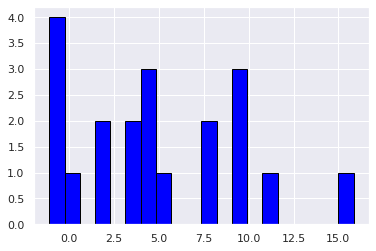

In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
plt.hist(test_profits, color = 'blue', edgecolor = 'black',
         bins = 20)
yes = 0
for i in range(len(test_profits)):
  if test_profits[i]>=0:
    yes += 1
percentage_profitting = yes/len(test_profits)
average_profit = np.mean(test_profits)
CTE_upper = np.mean([i for i in test_profits if i >= np.quantile(test_profits, 0.95)])
CTE_lower = np.mean([i for i in test_profits if i <= np.quantile(test_profits, 0.05)])
CE_plus = np.mean([i for i in test_profits if i >= 0])
CE_minus = np.mean([i for i in test_profits if i <= 0])
print("Percentage Profitting: ", percentage_profitting)
print("Expected Profit: ", average_profit)
print("E[X|X>= 95 percentile]",CTE_upper)
print("E[X|X<= 5 percentile]",CTE_lower)
print("E[X|X>0]",CE_plus)
print("E[X|X<= 0]",CE_minus)

Percentage done:  0.0
Percentage done:  5.0
Percentage done:  10.0
Percentage done:  15.0
Percentage done:  20.0
Percentage done:  25.0
Percentage done:  30.0
Percentage done:  35.0
Percentage done:  40.0
Percentage done:  45.0
Percentage done:  50.0
Percentage done:  55.0
Percentage done:  60.0
Percentage done:  65.0
Percentage done:  70.0
Percentage done:  75.0
Percentage done:  80.0
Percentage done:  85.0
Percentage done:  90.0
Percentage done:  95.0
Percentage done:  100.0
Percentage done:  105.0
Percentage done:  110.0
Percentage done:  115.0
Percentage done:  120.0
Percentage done:  125.0
Percentage done:  130.0
Percentage done:  135.0
Percentage done:  140.0
Percentage done:  145.0
Percentage done:  150.0
Percentage done:  155.0
Percentage done:  160.0
Percentage done:  165.0
Percentage done:  170.0
Percentage done:  175.0
Percentage done:  180.0
Percentage done:  185.0
Percentage done:  190.0
Percentage done:  195.0
Percentage done:  200.0
Percentage done:  205.0
Percentage don

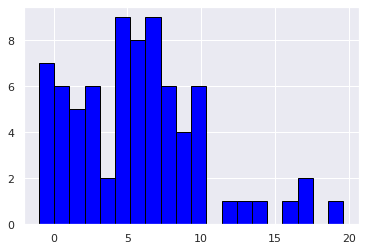

In [ ]:
actions = []
test_profits = []
samplepath_number = []
all_inventory = [[],[]]
all_spread = []
count=0
for dataset in test_data and train_data:   #See all SP 
  epoch_action = []
  inventory_X = []
  inventory_Y = []
  spread = []
  test_env = Environment1(dataset)
  pobs = test_env.reset()
  test_acts = []
  test_rewards = []
  print("Percentage done: ", count*100/len(test_data))
  count+=1
  for i in range(len(test_env.data)-1):
      #inventory.append(0)
      pact = Q(torch.from_numpy(np.array(pobs, dtype=np.float32).reshape(1, -1)))
      pact = np.argmax(pact.data)
      test_acts.append(pact.item())
      #print(pact.numpy())        
      # if pact.numpy() == 1:
      #   if i > 0:
      #     inventory[i] = inventory[i-1]+1

      obs, reward, done, epoch_inventory, epoch_spread = test_env.step(pact.numpy())
      inventory_X.append(len(epoch_inventory[0]))
      inventory_Y.append(len(epoch_inventory[1]))
      epoch_action.append(pact.numpy())
      test_rewards.append(reward)
      spread.append(epoch_spread)
      pobs = obs
  epoch_action[len(test_env.data)-2] = 19
  actions.append(epoch_action)
  all_inventory[0].append(inventory_X)  
  all_inventory[1].append(inventory_Y)    
  all_spread.append(spread)  
  test_profits.append(test_env.profits)
  samplepath_number.append(i+1)

plt.hist(test_profits, color = 'blue', edgecolor = 'black',
         bins = 20)
yes = 0
for i in range(len(test_profits)):
  if test_profits[i]>=0:
    yes += 1
percentage_profitting = yes/len(test_profits)
average_profit = np.mean(test_profits)
CTE_upper = np.mean([i for i in test_profits if i >= np.quantile(test_profits, 0.95)])
CTE_lower = np.mean([i for i in test_profits if i <= np.quantile(test_profits, 0.05)])
CE_plus = np.mean([i for i in test_profits if i >= 0])
CE_minus = np.mean([i for i in test_profits if i <= 0])
print("Percentage Profitting: ", percentage_profitting)
print("Expected Profit: ", average_profit)
print("E[X|X>= 95 percentile]",CTE_upper)
print("E[X|X<= 5 percentile]",CTE_lower)
print("E[X|X>0]",CE_plus)
print("E[X|X<= 0]",CE_minus)

In [ ]:
updated_all_inventory = all_inventory
for j in range(len(all_inventory)):
  for i in range(len(all_inventory[j])):
    updated_all_inventory[j][i].insert(0,0)
    #del updated_all_inventory[i][0]
    del updated_all_inventory[j][i][len(all_inventory[0])-1]
print(len(updated_all_inventory))
print(len(all_inventory))
print(len(actions))
print(len(updated_all_inventory[0]))

2
2
75
75


In [ ]:
inventory_spot_X = []
inventory_spot_Y = []
price_spot_X = []
price_spot_Y = []
action_spot = []
spread_spot = []
for i in range(len(actions)):
  for j in range(0,499):
    price_spot_X.append(train_data[i]['AAL'][j])
    price_spot_Y.append(train_data[i]['GOOG'][j])
    inventory_spot_X.append(updated_all_inventory[0][i][j])
    inventory_spot_Y.append(updated_all_inventory[1][i][j])
    action_spot.append(actions[i][j])
    spread_spot.append(all_spread[i][j])
X_price_quartile = []
print("Loaded")
X_first_quantile = np.quantile(price_spot_X,0.2)
X_second_quantile = np.quantile(price_spot_X,0.5)
X_third_quantile = np.quantile(price_spot_X,0.8)
print("Done")
for i in range(len(price_spot_X)):
  #print("Percent complete: ", i/len(price_spot))
  if price_spot_X[i] <= X_first_quantile:
    X_price_quartile.append(1)
  elif X_first_quantile < price_spot_X[i] <= X_second_quantile:
    X_price_quartile.append(2)
  elif X_second_quantile < price_spot_X[i] <= X_third_quantile:
    X_price_quartile.append(3)
  elif X_third_quantile < price_spot_X[i]:
    X_price_quartile.append(4)

Y_price_quartile = []
print("Loaded")
Y_first_quantile = np.quantile(price_spot_Y,0.2)
Y_second_quantile = np.quantile(price_spot_Y,0.5)
Y_third_quantile = np.quantile(price_spot_Y,0.8)
print("Done")
for i in range(len(price_spot_Y)):
  #print("Percent complete: ", i/len(price_spot))
  if price_spot_Y[i] <= Y_first_quantile:
    Y_price_quartile.append(1)
  elif Y_first_quantile < price_spot_Y[i] <= Y_second_quantile:
    Y_price_quartile.append(2)
  elif Y_second_quantile < price_spot_Y[i] <= Y_third_quantile:
    Y_price_quartile.append(3)
  elif Y_third_quantile < price_spot_Y[i]:
    Y_price_quartile.append(4)

spread_quartile = []
print("Loaded")
spread_first_quantile = np.quantile(spread_spot,0.2)
spread_second_quantile = np.quantile(spread_spot,0.5)
spread_third_quantile = np.quantile(spread_spot,0.8)
print("Done")
for i in range(len(spread_spot)):
  #print("Percent complete: ", i/len(price_spot))
  if spread_spot[i] <= spread_first_quantile:
    spread_quartile.append(1)
  elif spread_first_quantile < spread_spot[i] <= spread_second_quantile:
    spread_quartile.append(2)
  elif spread_second_quantile < spread_spot[i] <= spread_third_quantile:
    spread_quartile.append(3)
  elif spread_third_quantile < spread_spot[i]:
    spread_quartile.append(4)

data = np.transpose([X_price_quartile, Y_price_quartile, inventory_spot_X,inventory_spot_Y,action_spot,spread_quartile]) 
raw_data =  np.transpose([price_spot_X, price_spot_Y, inventory_spot_X,inventory_spot_Y,action_spot,spread_spot]) 
df = pd.DataFrame(data, columns = ['priceX','priceY', 'inventoryX','inventoryY','action','spread'])
df_raw = pd.DataFrame(raw_data, columns = ['priceX','priceY', 'inventoryX','inventoryY','action','spread'])

Loaded
Done
Loaded
Done
Loaded
Done


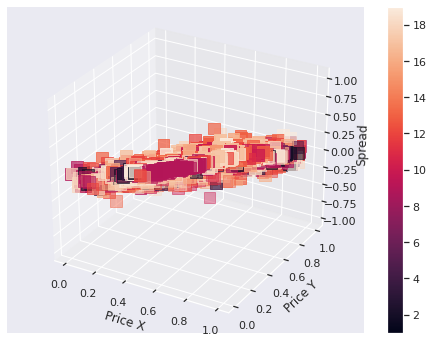

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
#import matplotlib.pyplot as plt
from pylab import *


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')


#colmap = cm.ScalarMappable(cmap=cm.Greens_r)
colmap = cm.ScalarMappable()
colmap.set_array(df_raw[['action']])

#ax.scatter(df_raw[['priceX']], df_raw[['priceY']], df_raw[['spread']], marker='s',s = 140, c=df_raw[['action']],cmap='Greens_r');
ax.scatter(df_raw[['priceX']], df_raw[['priceY']], df_raw[['spread']], marker='s',s = 140, c=df_raw[['action']]);
cb = fig.colorbar(colmap)

ax.set_xlabel('Price X');
ax.set_ylabel('Price Y');
ax.set_zlabel('Spread');
plt.show()
ax.view_init(azim = 180+40,elev = 22)

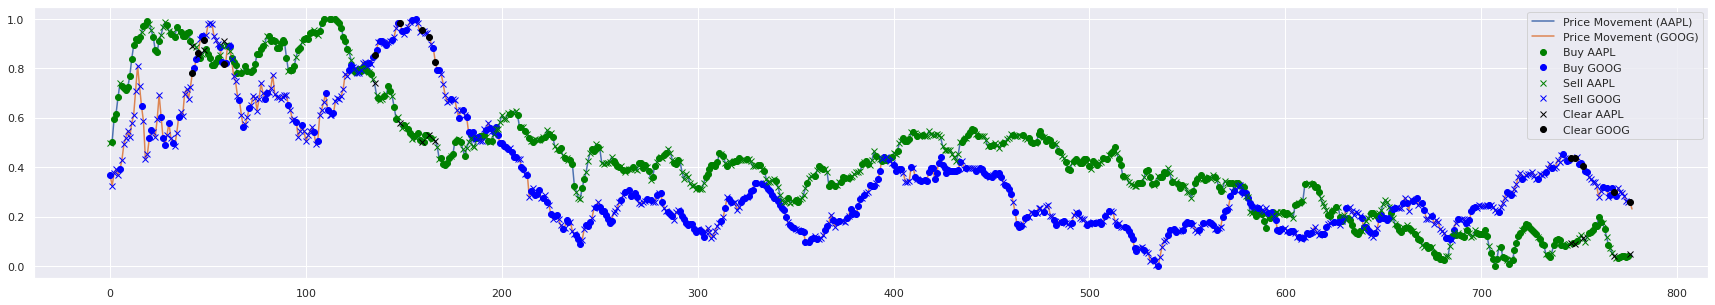

In [ ]:
buyX_point = []
buyX_time = []
buyY_point = []
buyY_time = []
sellX_point = []
sellX_time = []
sellY_point = []
sellY_time = []
clearX_point = []
clearX_time = []
clearY_point = []
clearY_time = []
sp_num = 2
X = splitted_data_pooled[sp_num]['AAL']
Y = splitted_data_pooled[sp_num]['GOOG']
t = [i for i in range(len(actions[sp_num])+1)]
for i in range(len(actions[sp_num])):
  if actions[sp_num][i] == 19:   #Execution
    clearX_point.append(X[i])
    clearX_time.append(i)
    clearY_point.append(Y[i])
    clearY_time.append(i)

  elif actions[sp_num][i] % 2 == 1:  #buy X and sell Y
    buyX_point.append(X[i])
    buyX_time.append(i)
    sellY_point.append(Y[i])
    sellY_time.append(i)

  elif actions[sp_num][i] % 2 == 0:   #buy Y and sell X
    buyY_point.append(Y[i])
    buyY_time.append(i)
    sellX_point.append(X[i])
    sellX_time.append(i)



fig = plt.figure(figsize=(30,5))
plt.plot(t,X)
plt.plot(t,Y)
plt.plot(buyX_time, buyX_point, 'o', color='green',linewidth = 0.1)
plt.plot(buyY_time, buyY_point, 'o', color='blue',linewidth = 0.1)
plt.plot(sellX_time, sellX_point, 'x', color='green', linewidth = 0.1)
plt.plot(sellY_time, sellY_point, 'x', color='blue',linewidth = 0.1)
plt.plot(clearX_time, clearX_point, 'x', color='black')
plt.plot(clearY_time, clearY_point, 'o', color='black');
plt.legend(["Price Movement (AAPL)","Price Movement (GOOG)","Buy AAPL","Buy GOOG", "Sell AAPL", "Sell GOOG", "Clear AAPL", "Clear GOOG"])
#print(mark)
plt.show()

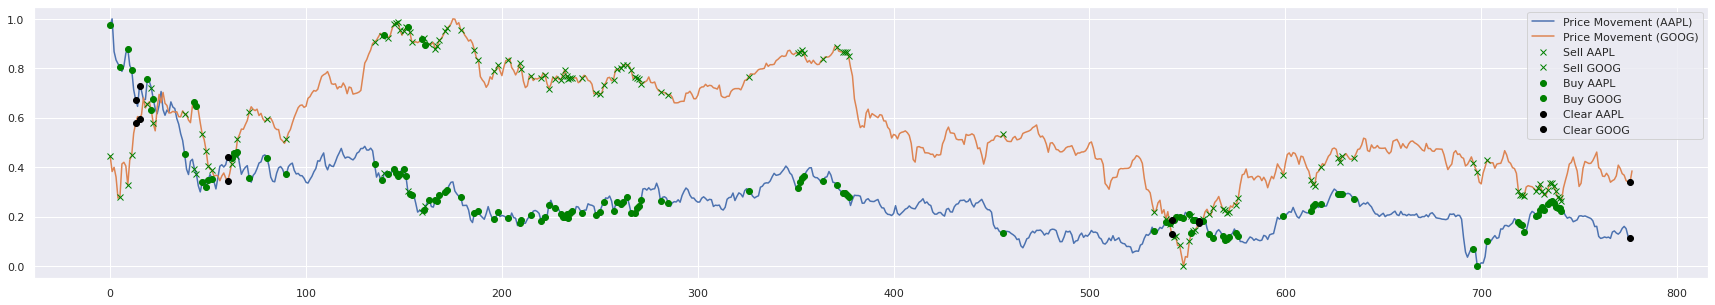

In [ ]:
#Only plot large buy sell orders
buyX_point = []
buyX_time = []
buyY_point = []
buyY_time = []
sellX_point = []
sellX_time = []
sellY_point = []
sellY_time = []
clearX_point = []
clearX_time = []
clearY_point = []
clearY_time = []
sp_num = 50
X = splitted_data_pooled[sp_num]['AAL']
Y = splitted_data_pooled[sp_num]['GOOG']
t = [i for i in range(len(actions[sp_num])+1)]
for i in range(len(actions[sp_num])):
  if actions[sp_num][i]>=15:
    if actions[sp_num][i] == 19:   #Execution
      clearX_point.append(X[i])
      clearX_time.append(i)
      clearY_point.append(Y[i])
      clearY_time.append(i)

    elif actions[sp_num][i] % 2 == 1:  #buy X and sell Y
      buyX_point.append(X[i])
      buyX_time.append(i)
      sellY_point.append(Y[i])
      sellY_time.append(i)

    elif actions[sp_num][i] % 2 == 0:   #buy Y and sell X
      buyY_point.append(Y[i])
      buyY_time.append(i)
      sellX_point.append(X[i])
      sellX_time.append(i)

fig = plt.figure(figsize=(30,5))
plt.plot(t,X)
plt.plot(t,Y)
plt.plot(sellX_time, sellX_point, 'x', color='green', linewidth = 0.1)
plt.plot(sellY_time, sellY_point, 'x', color='green',linewidth = 0.1)
plt.plot(buyX_time, buyX_point, 'o', color='green',linewidth = 0.1)
plt.plot(buyY_time, buyY_point, 'o', color='green',linewidth = 0.1)
plt.plot(clearX_time, clearX_point, 'o', color='black')
plt.plot(clearY_time, clearY_point, 'o', color='black');
plt.legend(["Price Movement (AAPL)","Price Movement (GOOG)","Sell AAPL","Sell GOOG", "Buy AAPL", "Buy GOOG", "Clear AAPL", "Clear GOOG"])
#print(mark)
plt.show()

777
